📘 Capítulo 5: O Desempenho de Sistemas de Controle com Retroação
📌 5.1 Introdução

A capacidade de ajustar o desempenho transitório e em regime permanente é uma vantagem dos sistemas de controle com retroação. As especificações de projeto incluem:

    Ultrapassagem percentual: Percentual do valor final que a resposta excede

    Tempo de assentamento: Tempo para a resposta permanecer dentro de uma faixa percentual do valor final

    Tempo de pico: Tempo para atingir o primeiro máximo

    Tempo de subida: Tempo para ir de 10% a 90% do valor final

    Erro de estado estacionário: Diferença entre entrada e saída em regime permanente

Compromissos são necessários entre especificações conflitantes.
📥 5.2 Sinais de Entrada para Teste

Sinais padronizados para análise:

    Degrau: r(t) = A, t > 0

    Rampa: r(t) = At, t > 0

    Parábola: r(t) = At²/2, t > 0

    Impulso: Função δ(t)

Esses sinais permitem comparação uniforme entre diferentes sistemas.
🔄 5.3 Desempenho de Sistema de Segunda Ordem

Função de transferência padrão:
math

T(s) = \frac{ω_n^2}{s^2 + 2ζω_n s + ω_n^2}

Parâmetros:

    ω_n: Frequência natural (rad/s)

    ζ: Fator de amortecimento

Equações importantes:

    Tempo de pico: T_p = π/(ω_n√(1-ζ²))

    Ultrapassagem percentual: UP = 100e^{-ζπ/√(1-ζ²)}

    Tempo de assentamento (2%): T_s = 4/(ζω_n)

Classificação:

    Subamortecido: 0 < ζ < 1

    Criticamente amortecido: ζ = 1

    Superamortecido: ζ > 1

📊 5.4 Efeitos de Terceiro Polo e Zero

Terceiro polo: Se distante (>10× da parte real dos polos dominantes), pouco efeito.
Zero adicional: Próximo aos polos → aumenta ultrapassagem, reduz tempo de assentamento.
🧮 5.5 Estimativa do Fator de Amortecimento

Método dos ciclos visíveis:
math

ζ ≈ 0.55 / (ciclos visíveis em 4 constantes de tempo)

Método da ultrapassagem: Usar relação UP = 100e^{-ζπ/√(1-ζ²)}
📍 5.6 Localização das Raízes no Plano-s

    Polos dominantes determinam resposta transitória

    Zeros afetam amplitude dos modos

    Visualização no plano-s ajuda projeto

⚖️ 5.7 Erro de Estado Estacionário

Para retroação unitária H(s)=1:

Constantes de erro:

    K_p = lim_{s→0} G(s) (posição)

    K_v = lim_{s→0} sG(s) (velocidade)

    K_a = lim_{s→0} s²G(s) (aceleração)

Erros:

    Degrau: e_ss = A/(1+K_p)

    Rampa: e_ss = A/K_v

    Parábola: e_ss = A/K_a

Tipo do sistema: Número de integradores em G(s)
🔧 5.8 Retroação Não-Unitária

Sistemas com H(s) ≠ 1 podem ser convertidos para forma unitária ajustando ganhos.
📈 5.9 Índices de Desempenho

Medidas quantitativas para otimização:

    ISE: ∫e²(t)dt

    IAE: ∫|e(t)|dt

    ITAE: ∫t|e(t)|dt (mais seletivo)

🧩 5.10 Simplificação de Sistemas Lineares

Técnicas para reduzir ordem mantendo comportamento similar:

    Desprezar polos distantes

    Método de casamento de frequência

    Aproximação de Routh

🛰️ 5.11 Exemplo: Controle do Telescópio Hubble

Projeto com especificações:

    UP ≤ 10%

    T_s ≤ 4s

    Minimizar erro a rampa

Solução: ζ = 0.6, ajuste de ganhos K e K_1
💻 5.12 MATLAB para Análise de Desempenho

Funções úteis:

    step(): resposta ao degrau

    impulse(): resposta ao impulso

    lsim(): resposta a sinal arbitrário

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct
from scipy import signal
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 12

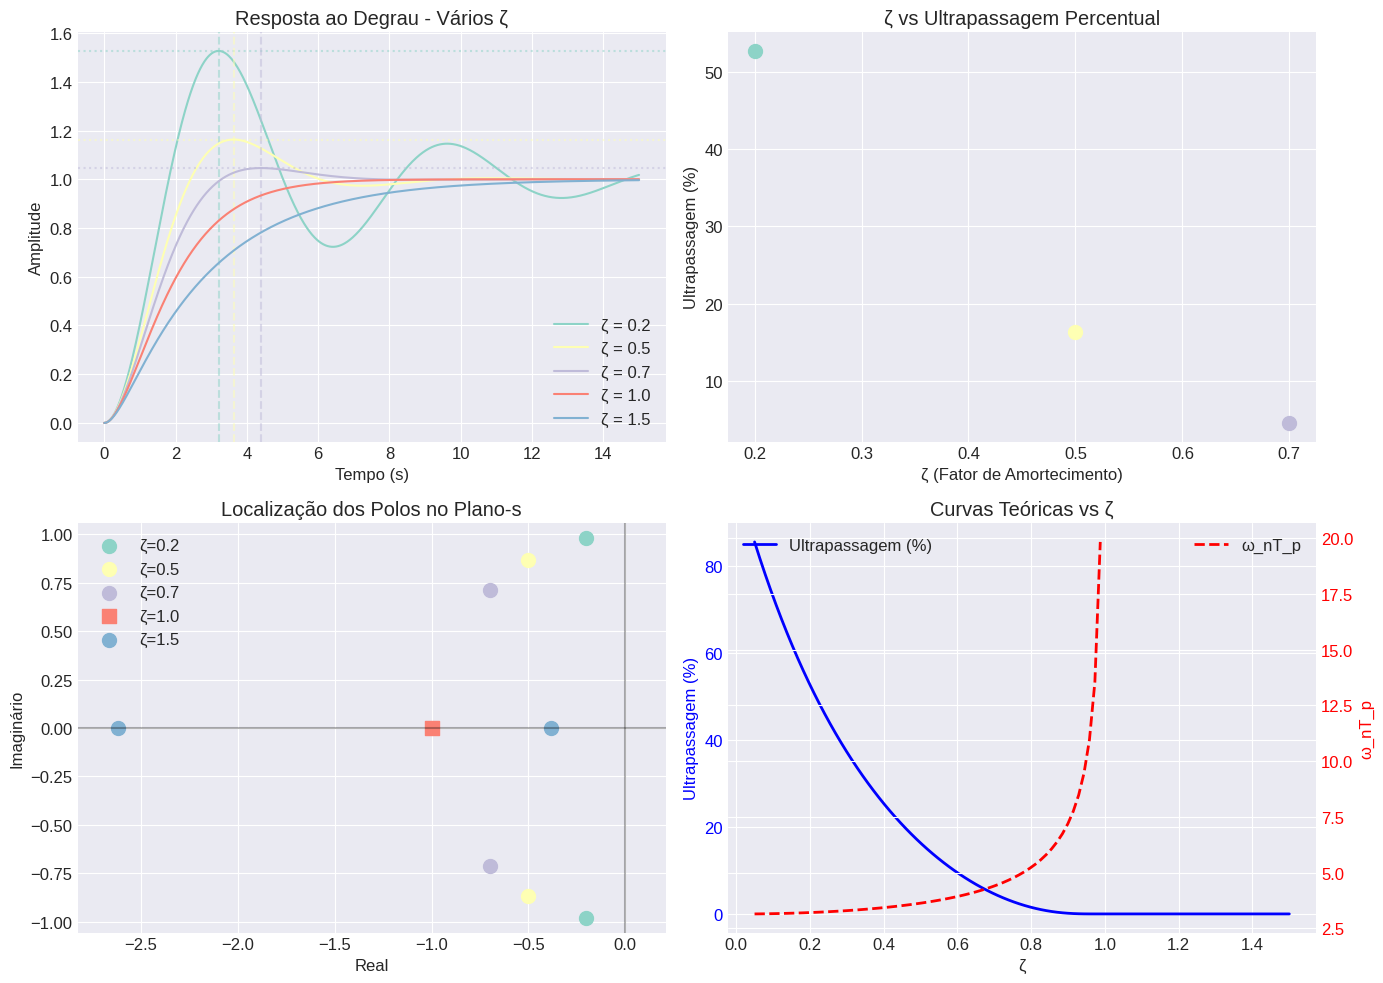

In [2]:
def segunda_ordem_response(zeta_values, omega_n=1):
    """
    Simula resposta ao degrau de sistema de 2ª ordem
    para diferentes valores de zeta
    """
    t = np.linspace(0, 15, 1000)

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()

    for idx, zeta in enumerate(zeta_values):
        # Sistema de 2ª ordem
        num = [omega_n**2]
        den = [1, 2*zeta*omega_n, omega_n**2]
        sys = ct.TransferFunction(num, den)

        # Resposta ao degrau
        t_out, y = ct.step_response(sys, t)

        # Gráfico 1: Respostas individuais
        ax1 = axes[0]
        ax1.plot(t_out, y, label=f'ζ = {zeta}')
        ax1.set_xlabel('Tempo (s)')
        ax1.set_ylabel('Amplitude')
        ax1.set_title('Resposta ao Degrau - Vários ζ')
        ax1.legend()
        ax1.grid(True)

        # Cálculo de métricas
        if zeta < 1:
            # Tempo de pico
            T_p = np.pi/(omega_n*np.sqrt(1-zeta**2))
            # Ultrapassagem
            overshoot = 100*np.exp(-zeta*np.pi/np.sqrt(1-zeta**2))
            # Tempo de assentamento (2%)
            T_s = 4/(zeta*omega_n)

            # Gráfico 2: Comparação ζ vs UP
            axes[1].scatter(zeta, overshoot, s=100, color=f'C{idx}')

            # Marcar no gráfico 1
            ax1.axvline(T_p, color=f'C{idx}', linestyle='--', alpha=0.5)
            ax1.axhline(1 + overshoot/100, color=f'C{idx}', linestyle=':', alpha=0.5)

    # Configurar gráfico 2
    axes[1].set_xlabel('ζ (Fator de Amortecimento)')
    axes[1].set_ylabel('Ultrapassagem (%)')
    axes[1].set_title('ζ vs Ultrapassagem Percentual')
    axes[1].grid(True)

    # Gráfico 3: Diagrama de polos
    ax3 = axes[2]
    for zeta in zeta_values:
        if zeta < 1:
            # Polos complexos conjugados
            real_part = -zeta*omega_n
            imag_part = omega_n*np.sqrt(1-zeta**2)
            ax3.scatter(real_part, imag_part, s=100, label=f'ζ={zeta}')
            ax3.scatter(real_part, -imag_part, s=100, color=f'C{zeta_values.index(zeta)}')
        elif zeta == 1:
            # Polo real duplo
            ax3.scatter(-omega_n, 0, s=100, label=f'ζ={zeta}', marker='s')
        else:
            # Dois polos reais
            p1 = -zeta*omega_n + omega_n*np.sqrt(zeta**2-1)
            p2 = -zeta*omega_n - omega_n*np.sqrt(zeta**2-1)
            ax3.scatter(p1, 0, s=100, color=f'C{zeta_values.index(zeta)}')
            ax3.scatter(p2, 0, s=100, color=f'C{zeta_values.index(zeta)}', label=f'ζ={zeta}')

    ax3.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax3.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    ax3.set_xlabel('Real')
    ax3.set_ylabel('Imaginário')
    ax3.set_title('Localização dos Polos no Plano-s')
    ax3.legend()
    ax3.grid(True)
    ax3.axis('equal')

    # Gráfico 4: Curvas teóricas
    zeta_range = np.linspace(0.05, 1.5, 100)
    overshoot_curve = 100*np.exp(-zeta_range*np.pi/np.sqrt(1-zeta_range**2))
    overshoot_curve[zeta_range >= 1] = 0

    T_p_normalized = np.pi/(np.sqrt(1-zeta_range**2))
    T_p_normalized[zeta_range >= 1] = np.inf

    ax4 = axes[3]
    ax4.plot(zeta_range, overshoot_curve, 'b-', linewidth=2, label='Ultrapassagem (%)')
    ax4.set_xlabel('ζ')
    ax4.set_ylabel('Ultrapassagem (%)', color='b')
    ax4.tick_params(axis='y', labelcolor='b')
    ax4.grid(True)

    ax4_twin = ax4.twinx()
    ax4_twin.plot(zeta_range[zeta_range < 1], T_p_normalized[zeta_range < 1],
                  'r--', linewidth=2, label='ω_nT_p')
    ax4_twin.set_ylabel('ω_nT_p', color='r')
    ax4_twin.tick_params(axis='y', labelcolor='r')

    ax4.set_title('Curvas Teóricas vs ζ')
    ax4.legend(loc='upper left')
    ax4_twin.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

    # Retornar sistemas para uso posterior
    systems = []
    for zeta in zeta_values:
        num = [omega_n**2]
        den = [1, 2*zeta*omega_n, omega_n**2]
        systems.append(ct.TransferFunction(num, den))

    return systems

# Executar simulação
zeta_values = [0.2, 0.5, 0.7, 1.0, 1.5]
sistemas = segunda_ordem_response(zeta_values)

Executando simulação do efeito de polo e zero...


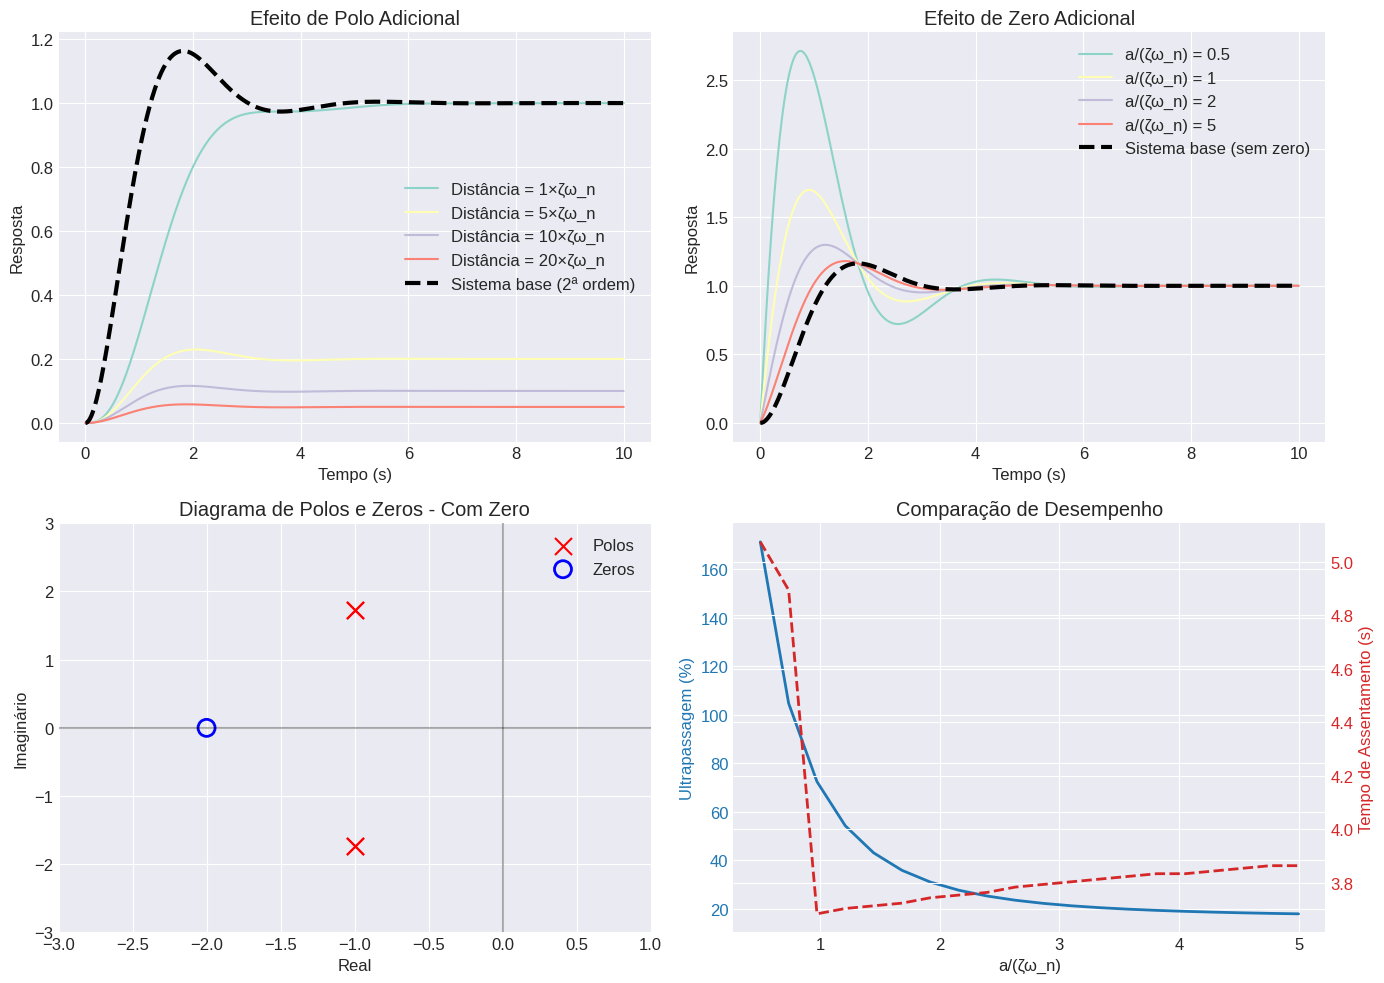

In [9]:
# 2. Efeito de Polo e Zero Adicionais (VERSÃO CORRIGIDA)

def efeito_polo_zero():
    """
    Demonstra efeito de polo e zero adicionais
    """
    t = np.linspace(0, 10, 1000)

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # Sistema de 2ª ordem base
    zeta = 0.5
    omega_n = 2
    num_base = [omega_n**2]
    den_base = [1, 2*zeta*omega_n, omega_n**2]
    sys_base = ct.TransferFunction(num_base, den_base)

    # A) Efeito de polo adicional
    axes[0,0].set_title('Efeito de Polo Adicional')
    poles_distance = [1, 5, 10, 20]  # Distância relativa a ζω_n

    for dist in poles_distance:
        polo_extra = -dist * zeta * omega_n
        # Multiplicar polinômios: (s² + 2ζω_ns + ω_n²)(s - polo_extra)
        den = np.convolve(den_base, [1, -polo_extra])
        sys = ct.TransferFunction(num_base, den)
        t_out, y = ct.step_response(sys, t)
        axes[0,0].plot(t_out, y, label=f'Distância = {dist}×ζω_n')

    t_out, y_base = ct.step_response(sys_base, t)
    axes[0,0].plot(t_out, y_base, 'k--', linewidth=3, label='Sistema base (2ª ordem)')
    axes[0,0].set_xlabel('Tempo (s)')
    axes[0,0].set_ylabel('Resposta')
    axes[0,0].legend()
    axes[0,0].grid(True)

    # B) Efeito de zero adicional
    axes[0,1].set_title('Efeito de Zero Adicional')
    zero_positions = [0.5, 1, 2, 5]  # a/(ζω_n)

    for ratio in zero_positions:
        a = ratio * zeta * omega_n
        num = [omega_n**2/a, omega_n**2]
        sys = ct.TransferFunction(num, den_base)
        t_out, y = ct.step_response(sys, t)
        axes[0,1].plot(t_out, y, label=f'a/(ζω_n) = {ratio}')

    axes[0,1].plot(t_out, y_base, 'k--', linewidth=3, label='Sistema base (sem zero)')
    axes[0,1].set_xlabel('Tempo (s)')
    axes[0,1].set_ylabel('Resposta')
    axes[0,1].legend()
    axes[0,1].grid(True)

    # C) Diagrama de polos e zeros - CORRIGIDO
    axes[1,0].set_title('Diagrama de Polos e Zeros - Com Zero')
    ratio = 2
    a = ratio * zeta * omega_n
    num = [omega_n**2/a, omega_n**2]
    sys_com_zero = ct.TransferFunction(num, den_base)

    # CORREÇÃO: Obter polos e zeros corretamente
    # Para obter polos: resolver denominador = 0
    poles = np.roots(den_base)

    # Para obter zeros: resolver numerador = 0
    zeros = np.roots(num)

    # Plotar polos (x) e zeros (o)
    for pole in poles:
        if np.imag(pole) == 0:
            axes[1,0].scatter(np.real(pole), 0, s=150, marker='x', color='r')
        else:
            axes[1,0].scatter(np.real(pole), np.imag(pole), s=150, marker='x', color='r', label='Polos' if pole == poles[0] else "")
            axes[1,0].scatter(np.real(pole), -np.imag(pole), s=150, marker='x', color='r')

    for zero in zeros:
        axes[1,0].scatter(np.real(zero), np.imag(zero), s=150, marker='o',
                         color='b', facecolors='none', linewidths=2,
                         label='Zeros' if zero == zeros[0] else "")

    axes[1,0].axhline(y=0, color='k', linestyle='-', alpha=0.3)
    axes[1,0].axvline(x=0, color='k', linestyle='-', alpha=0.3)
    axes[1,0].set_xlabel('Real')
    axes[1,0].set_ylabel('Imaginário')

    # Remover legendas duplicadas
    handles, labels = axes[1,0].get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    axes[1,0].legend(by_label.values(), by_label.keys())

    axes[1,0].grid(True)
    axes[1,0].set_xlim([-3, 1])
    axes[1,0].set_ylim([-3, 3])

    # D) Comparação de desempenho
    axes[1,1].set_title('Comparação de Desempenho')

    # Calcular métricas para diferentes posições de zero
    ratios = np.linspace(0.5, 5, 20)
    overshoots = []
    settling_times = []

    for ratio in ratios:
        a = ratio * zeta * omega_n
        num = [omega_n**2/a, omega_n**2]
        sys = ct.TransferFunction(num, den_base)
        t_out, y = ct.step_response(sys, np.linspace(0, 10, 1000))

        # Ultrapassagem
        y_max = np.max(y)
        y_final = y[-1]
        if y_final != 0:
            overshoot = 100*(y_max - y_final)/y_final
        else:
            overshoot = 0
        overshoots.append(overshoot)

        # Tempo de assentamento (2%)
        target = y_final
        lower = 0.98 * target
        upper = 1.02 * target

        # Encontrar último ponto fora da faixa
        outside = np.where((y < lower) | (y > upper))[0]
        if len(outside) > 0:
            settling_times.append(t_out[outside[-1]])
        else:
            settling_times.append(0)

    color = 'tab:blue'
    axes[1,1].plot(ratios, overshoots, color=color, linewidth=2)
    axes[1,1].set_xlabel('a/(ζω_n)')
    axes[1,1].set_ylabel('Ultrapassagem (%)', color=color)
    axes[1,1].tick_params(axis='y', labelcolor=color)
    axes[1,1].grid(True)

    ax_twin = axes[1,1].twinx()
    color = 'tab:red'
    ax_twin.plot(ratios, settling_times, color=color, linestyle='--', linewidth=2)
    ax_twin.set_ylabel('Tempo de Assentamento (s)', color=color)
    ax_twin.tick_params(axis='y', labelcolor=color)

    plt.tight_layout()
    plt.show()

# Executar simulação corrigida
print("Executando simulação do efeito de polo e zero...")
efeito_polo_zero()


Executando simulação do erro de estado estacionário...


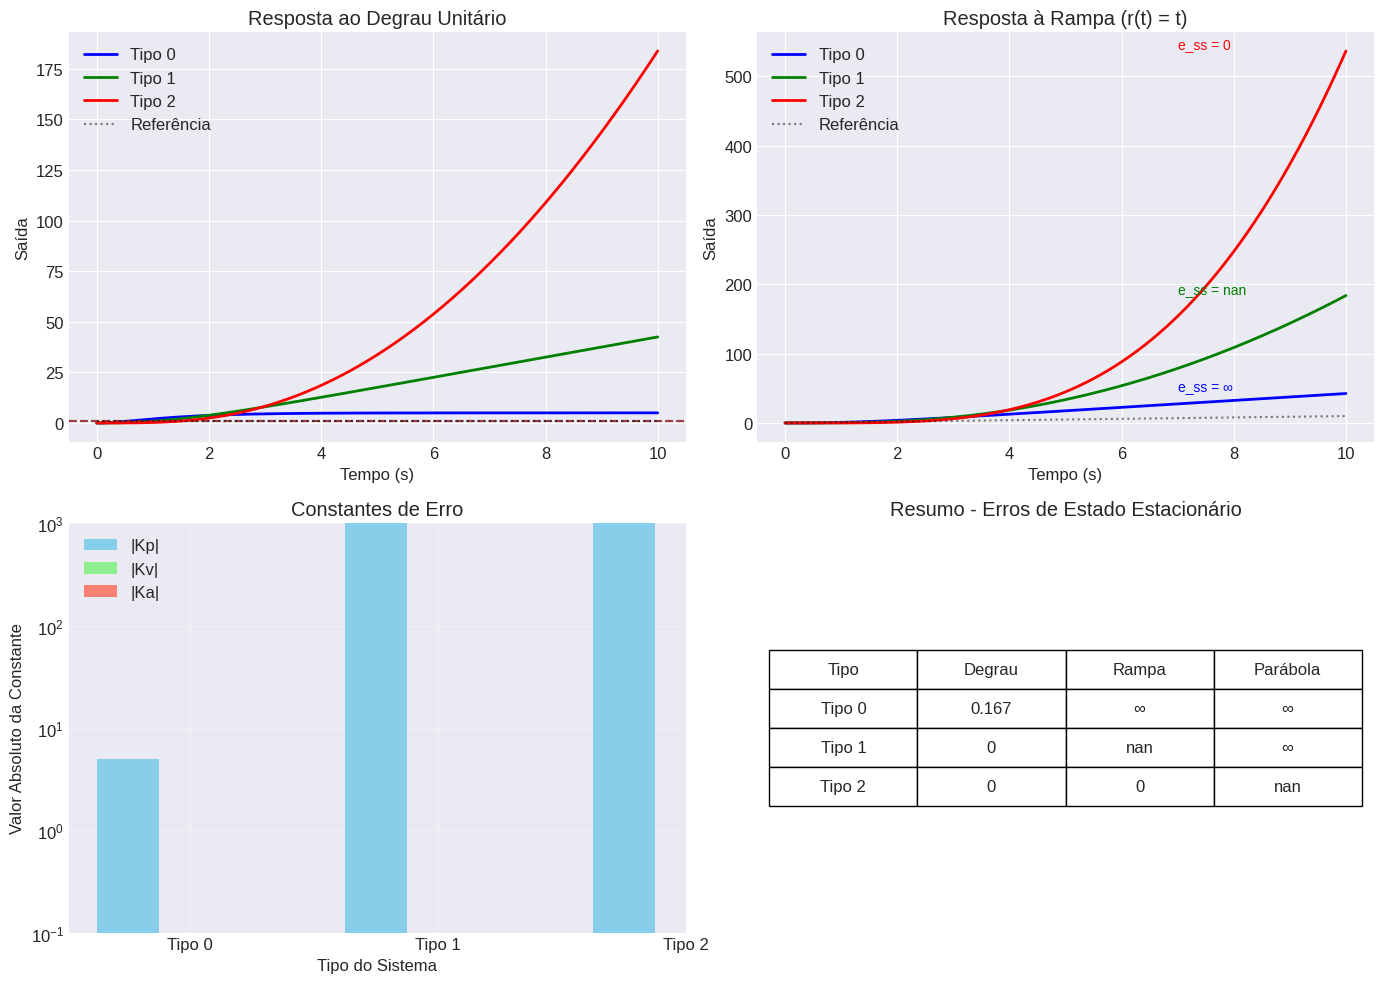

In [13]:
# 3. Erro de Estado Estacionário (CORREÇÃO FINAL)

def erro_estado_estacionario():
    """
    Simula erro de estado estacionário para diferentes tipos de sistema
    """
    t = np.linspace(0, 10, 1000)

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # Tipo 0: Sem integradores
    sys0 = ct.TransferFunction([10], [1, 3, 2])

    # Tipo 1: 1 integrador
    sys1 = ct.TransferFunction([10], [1, 3, 2, 0])

    # Tipo 2: 2 integradores
    sys2 = ct.TransferFunction([10], [1, 3, 2, 0, 0])

    systems = [sys0, sys1, sys2]
    labels = ['Tipo 0', 'Tipo 1', 'Tipo 2']
    colors = ['b', 'g', 'r']

    # A) Resposta ao degrau
    axes[0,0].set_title('Resposta ao Degrau Unitário')
    for sys, label, color in zip(systems, labels, colors):
        t_out, y = ct.step_response(sys, t)
        axes[0,0].plot(t_out, y, label=label, color=color, linewidth=2)

        # Calcular erro estacionário
        K = ct.dcgain(sys)
        if label == 'Tipo 0':
            e_ss = 1/(1 + K) if K != -1 else np.inf
            axes[0,0].axhline(y=1 - e_ss, color=color, linestyle='--', alpha=0.5)
        else:
            axes[0,0].axhline(y=1, color=color, linestyle='--', alpha=0.5)

    axes[0,0].plot(t, np.ones_like(t), 'k:', alpha=0.5, label='Referência')
    axes[0,0].set_xlabel('Tempo (s)')
    axes[0,0].set_ylabel('Saída')
    axes[0,0].legend()
    axes[0,0].grid(True)

    # B) Resposta à rampa - CORREÇÃO: forced_response retorna 2 valores
    axes[0,1].set_title('Resposta à Rampa (r(t) = t)')

    # Criar sinal de rampa
    ramp_signal = t

    for sys, label, color in zip(systems, labels, colors):
        # CORREÇÃO: forced_response retorna apenas (t, y)
        t_out, y = ct.forced_response(sys, t, ramp_signal)
        axes[0,1].plot(t_out, y, label=label, color=color, linewidth=2)

        # Calcular erro estacionário
        if label == 'Tipo 0':
            e_ss_line = '∞'
        elif label == 'Tipo 1':
            # Criar sistema s*G(s)
            num_s = np.convolve(sys.num[0][0], [1, 0])  # Multiplicar por s
            den_s = sys.den[0][0]
            sys_s = ct.TransferFunction(num_s, den_s)
            Kv = ct.dcgain(sys_s)
            e_ss = 1/Kv if Kv != 0 else np.inf
            e_ss_line = f'{e_ss:.2f}' if not np.isinf(e_ss) else '∞'
        else:
            e_ss_line = '0'

        # Adicionar texto com erro
        axes[0,1].text(7, y[-1], f'e_ss = {e_ss_line}',
                       color=color, fontsize=10, verticalalignment='bottom')

    axes[0,1].plot(t, ramp_signal, 'k:', alpha=0.5, label='Referência')
    axes[0,1].set_xlabel('Tempo (s)')
    axes[0,1].set_ylabel('Saída')
    axes[0,1].legend()
    axes[0,1].grid(True)

    # C) Cálculo das constantes de erro
    axes[1,0].set_title('Constantes de Erro')

    Kp_values = []
    Kv_values = []
    Ka_values = []

    for sys, label in zip(systems, labels):
        # Kp = G(0)
        Kp = ct.dcgain(sys)
        Kp_values.append(Kp if not np.isinf(Kp) else 1e6)

        # Kv = lim s→0 sG(s)
        if label == 'Tipo 0':
            Kv_values.append(0)  # Tipo 0 tem Kv = 0
        else:
            # Multiplicar por s no numerador
            num_s = np.convolve(sys.num[0][0], [1, 0])
            sys_s = ct.TransferFunction(num_s, sys.den[0][0])
            Kv = ct.dcgain(sys_s)
            Kv_values.append(Kv if not np.isinf(Kv) and Kv != 0 else 1e6)

        # Ka = lim s→0 s²G(s)
        if label in ['Tipo 0', 'Tipo 1']:
            Ka_values.append(0)
        else:
            # Multiplicar por s² no numerador
            num_s2 = np.convolve(sys.num[0][0], [1, 0, 0])
            sys_s2 = ct.TransferFunction(num_s2, sys.den[0][0])
            Ka = ct.dcgain(sys_s2)
            Ka_values.append(Ka if not np.isinf(Ka) and Ka != 0 else 1e6)

    x = range(len(labels))
    width = 0.25

    # Converter para valores absolutos para plotagem log
    Kp_abs = [abs(k) for k in Kp_values]
    Kv_abs = [abs(k) for k in Kv_values]
    Ka_abs = [abs(k) for k in Ka_values]

    axes[1,0].bar([i - width for i in x], Kp_abs, width, label='|Kp|', color='skyblue')
    axes[1,0].bar(x, Kv_abs, width, label='|Kv|', color='lightgreen')
    axes[1,0].bar([i + width for i in x], Ka_abs, width, label='|Ka|', color='salmon')

    axes[1,0].set_xlabel('Tipo do Sistema')
    axes[1,0].set_ylabel('Valor Absoluto da Constante')
    axes[1,0].set_xticks(x)
    axes[1,0].set_xticklabels(labels)
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)
    axes[1,0].set_yscale('log')
    axes[1,0].set_ylim([0.1, 1e3])

    # D) Tabela resumo
    axes[1,1].set_title('Resumo - Erros de Estado Estacionário')
    axes[1,1].axis('off')

    table_data = []
    for i, label in enumerate(labels):
        if label == 'Tipo 0':
            Kp = Kp_values[i]
            if Kp != 1e6 and Kp != -1:
                e_ss_step = f'{1/(1 + Kp):.3f}'
            else:
                e_ss_step = '∞'
            e_ss_ramp = '∞'
            e_ss_parab = '∞'
        elif label == 'Tipo 1':
            e_ss_step = '0'
            Kv = Kv_values[i]
            if Kv != 1e6 and Kv != 0:
                e_ss_ramp = f'{1/Kv:.3f}'
            else:
                e_ss_ramp = '∞'
            e_ss_parab = '∞'
        else:
            e_ss_step = '0'
            e_ss_ramp = '0'
            Ka = Ka_values[i]
            if Ka != 1e6 and Ka != 0:
                e_ss_parab = f'{1/Ka:.3f}'
            else:
                e_ss_parab = '∞'

        table_data.append([label, e_ss_step, e_ss_ramp, e_ss_parab])

    table = axes[1,1].table(cellText=table_data,
                            colLabels=['Tipo', 'Degrau', 'Rampa', 'Parábola'],
                            cellLoc='center',
                            loc='center',
                            colWidths=[0.2, 0.2, 0.2, 0.2])

    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 2)

    plt.tight_layout()
    plt.show()

    return systems

print("\nExecutando simulação do erro de estado estacionário...")
sistemas_erro = erro_estado_estacionario()

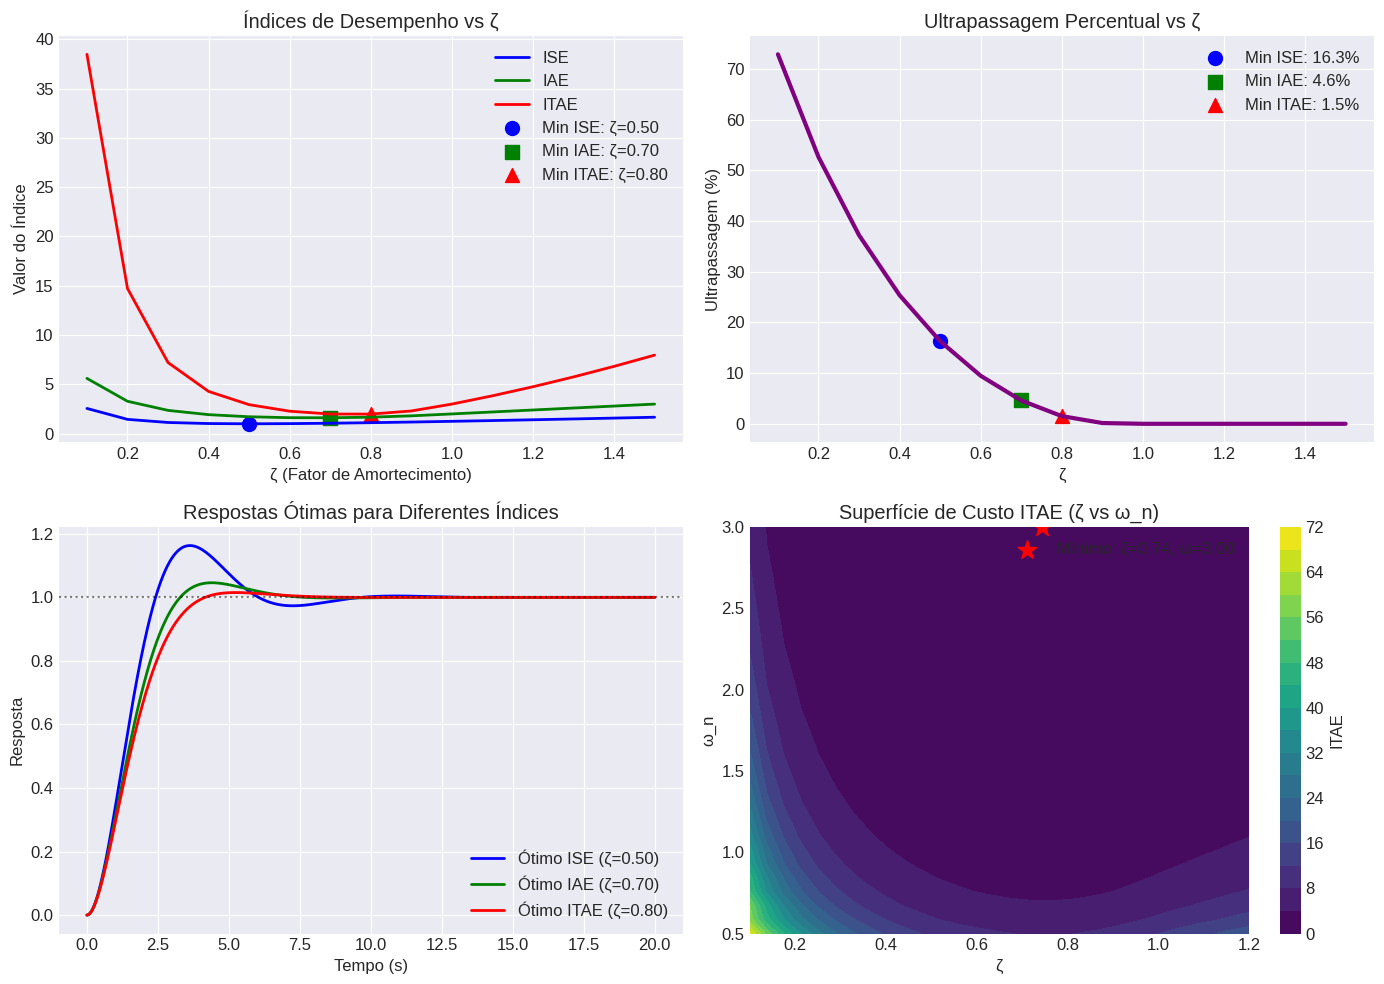

Valores ótimos encontrados:
ISE: ζ = 0.500, Índice = 1.000
IAE: ζ = 0.700, Índice = 1.610
ITAE: ζ = 0.800, Índice = 1.984


In [5]:
def indices_desempenho():
    """
    Calcula e compara diferentes índices de desempenho
    """
    t = np.linspace(0, 20, 2000)

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # Testar com diferentes valores de zeta
    zeta_values = np.linspace(0.1, 1.5, 15)
    omega_n = 1

    ISE_values = []
    IAE_values = []
    ITAE_values = []
    overshoots = []

    for zeta in zeta_values:
        # Sistema de 2ª ordem
        num = [omega_n**2]
        den = [1, 2*zeta*omega_n, omega_n**2]
        sys = ct.TransferFunction(num, den)

        # Resposta ao degrau
        t_out, y = ct.step_response(sys, t)

        # Erro
        e = 1 - y

        # Calcular índices
        ISE = np.trapz(e**2, t_out)
        IAE = np.trapz(np.abs(e), t_out)
        ITAE = np.trapz(t_out * np.abs(e), t_out)

        ISE_values.append(ISE)
        IAE_values.append(IAE)
        ITAE_values.append(ITAE)

        # Calcular ultrapassagem
        if zeta < 1:
            overshoot = 100*np.exp(-zeta*np.pi/np.sqrt(1-zeta**2))
        else:
            overshoot = 0
        overshoots.append(overshoot)

    # A) Índices vs Zeta
    axes[0,0].plot(zeta_values, ISE_values, 'b-', linewidth=2, label='ISE')
    axes[0,0].plot(zeta_values, IAE_values, 'g-', linewidth=2, label='IAE')
    axes[0,0].plot(zeta_values, ITAE_values, 'r-', linewidth=2, label='ITAE')
    axes[0,0].set_xlabel('ζ (Fator de Amortecimento)')
    axes[0,0].set_ylabel('Valor do Índice')
    axes[0,0].set_title('Índices de Desempenho vs ζ')
    axes[0,0].legend()
    axes[0,0].grid(True)

    # Marcar mínimos
    min_ISE_idx = np.argmin(ISE_values)
    min_IAE_idx = np.argmin(IAE_values)
    min_ITAE_idx = np.argmin(ITAE_values)

    axes[0,0].scatter(zeta_values[min_ISE_idx], ISE_values[min_ISE_idx],
                     s=100, color='b', marker='o', label=f'Min ISE: ζ={zeta_values[min_ISE_idx]:.2f}')
    axes[0,0].scatter(zeta_values[min_IAE_idx], IAE_values[min_IAE_idx],
                     s=100, color='g', marker='s', label=f'Min IAE: ζ={zeta_values[min_IAE_idx]:.2f}')
    axes[0,0].scatter(zeta_values[min_ITAE_idx], ITAE_values[min_ITAE_idx],
                     s=100, color='r', marker='^', label=f'Min ITAE: ζ={zeta_values[min_ITAE_idx]:.2f}')
    axes[0,0].legend()

    # B) Ultrapassagem vs Zeta
    axes[0,1].plot(zeta_values, overshoots, 'purple', linewidth=3)
    axes[0,1].set_xlabel('ζ')
    axes[0,1].set_ylabel('Ultrapassagem (%)')
    axes[0,1].set_title('Ultrapassagem Percentual vs ζ')
    axes[0,1].grid(True)

    # Marcar valores nos mínimos dos índices
    colors = ['b', 'g', 'r']
    markers = ['o', 's', '^']
    labels = ['Min ISE', 'Min IAE', 'Min ITAE']

    for idx, (color, marker, label) in enumerate(zip(colors, markers, labels)):
        if idx == 0:
            zeta_min = zeta_values[min_ISE_idx]
        elif idx == 1:
            zeta_min = zeta_values[min_IAE_idx]
        else:
            zeta_min = zeta_values[min_ITAE_idx]

        if zeta_min < 1:
            overshoot_min = 100*np.exp(-zeta_min*np.pi/np.sqrt(1-zeta_min**2))
        else:
            overshoot_min = 0

        axes[0,1].scatter(zeta_min, overshoot_min, s=100,
                         color=color, marker=marker, label=f'{label}: {overshoot_min:.1f}%')

    axes[0,1].legend()

    # C) Comparação de respostas nos pontos ótimos
    axes[1,0].set_title('Respostas Ótimas para Diferentes Índices')

    optimal_zetas = [zeta_values[min_ISE_idx],
                     zeta_values[min_IAE_idx],
                     zeta_values[min_ITAE_idx]]
    colors = ['b', 'g', 'r']
    labels = ['Ótimo ISE', 'Ótimo IAE', 'Ótimo ITAE']

    for zeta_opt, color, label in zip(optimal_zetas, colors, labels):
        num = [omega_n**2]
        den = [1, 2*zeta_opt*omega_n, omega_n**2]
        sys = ct.TransferFunction(num, den)
        t_out, y = ct.step_response(sys, t)
        axes[1,0].plot(t_out, y, color=color, linewidth=2, label=f'{label} (ζ={zeta_opt:.2f})')

    axes[1,0].axhline(y=1, color='k', linestyle=':', alpha=0.5)
    axes[1,0].set_xlabel('Tempo (s)')
    axes[1,0].set_ylabel('Resposta')
    axes[1,0].legend()
    axes[1,0].grid(True)

    # D) Superfície de custo (para 2 parâmetros)
    axes[1,1].set_title('Superfície de Custo ITAE (ζ vs ω_n)')

    # Criar grid de parâmetros
    zeta_grid = np.linspace(0.1, 1.2, 30)
    omega_grid = np.linspace(0.5, 3, 30)
    Z, O = np.meshgrid(zeta_grid, omega_grid)

    ITAE_grid = np.zeros_like(Z)

    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            zeta = Z[i, j]
            omega_n_val = O[i, j]

            num = [omega_n_val**2]
            den = [1, 2*zeta*omega_n_val, omega_n_val**2]
            sys = ct.TransferFunction(num, den)

            t_out, y = ct.step_response(sys, np.linspace(0, 20, 1000))
            e = 1 - y
            ITAE = np.trapz(t_out * np.abs(e), t_out)
            ITAE_grid[i, j] = ITAE

    # Plotar contorno
    contour = axes[1,1].contourf(Z, O, ITAE_grid, 20, cmap='viridis')
    plt.colorbar(contour, ax=axes[1,1], label='ITAE')

    # Marcar mínimo
    min_idx = np.unravel_index(np.argmin(ITAE_grid), ITAE_grid.shape)
    axes[1,1].scatter(Z[min_idx], O[min_idx], s=200,
                     color='red', marker='*', label=f'Mínimo: ζ={Z[min_idx]:.2f}, ω={O[min_idx]:.2f}')

    axes[1,1].set_xlabel('ζ')
    axes[1,1].set_ylabel('ω_n')
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Retornar valores ótimos
    optimal_values = {
        'ISE': {'zeta': zeta_values[min_ISE_idx], 'value': ISE_values[min_ISE_idx]},
        'IAE': {'zeta': zeta_values[min_IAE_idx], 'value': IAE_values[min_IAE_idx]},
        'ITAE': {'zeta': zeta_values[min_ITAE_idx], 'value': ITAE_values[min_ITAE_idx]}
    }

    return optimal_values

# Executar simulação
valores_otimos = indices_desempenho()
print("Valores ótimos encontrados:")
for idx, (key, value) in enumerate(valores_otimos.items()):
    print(f"{key}: ζ = {value['zeta']:.3f}, Índice = {value['value']:.3f}")

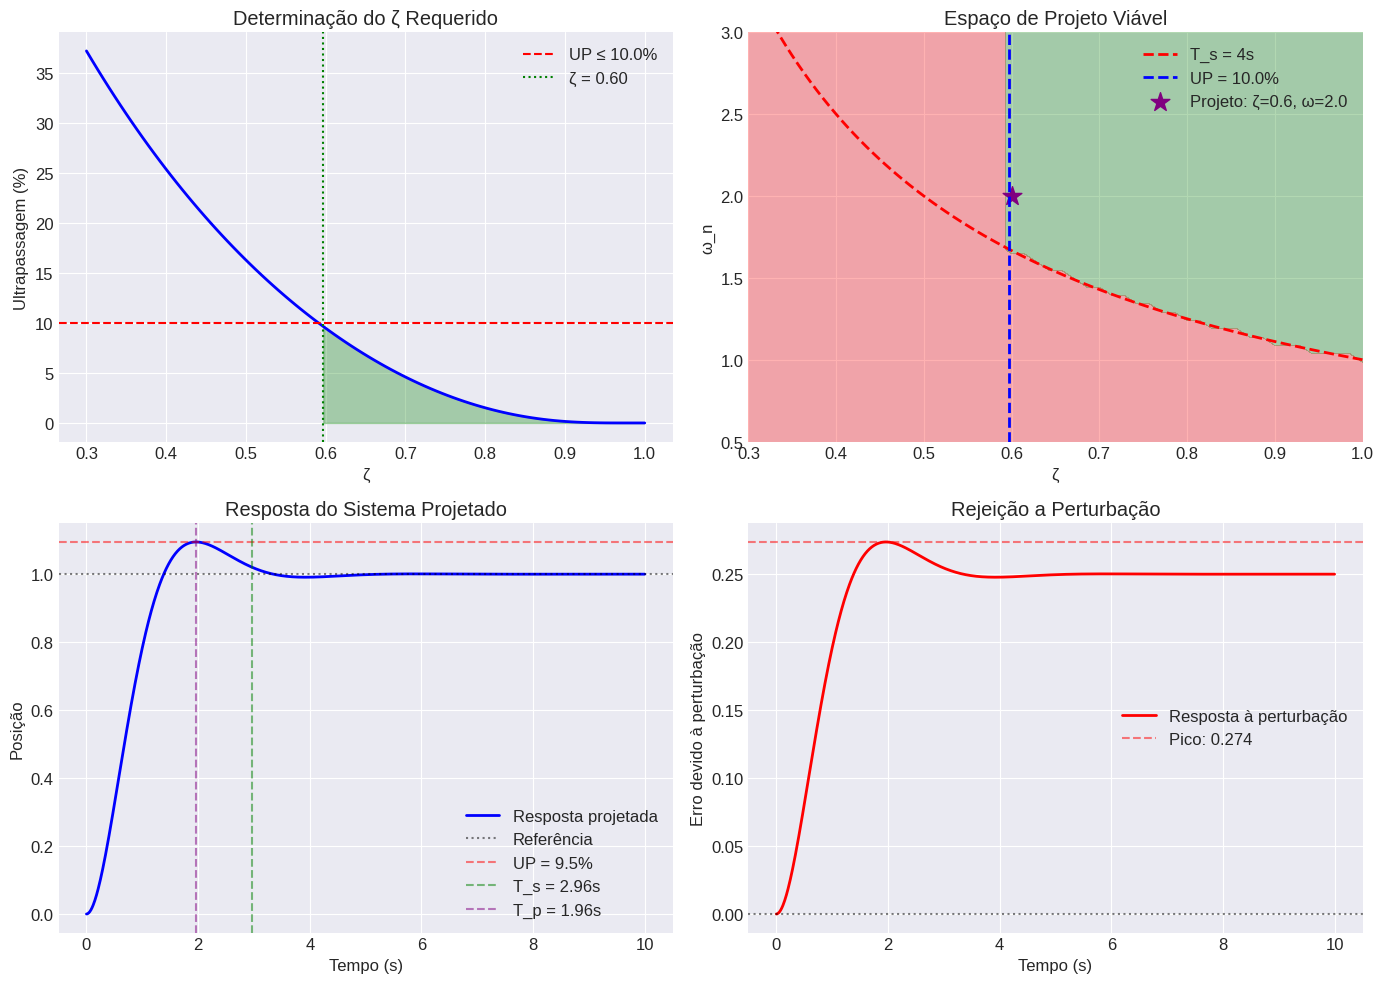

RESUMO DO PROJETO DE CONTROLE DE POSIÇÃO
Especificações:
  • Ultrapassagem máxima: ≤ 10.0%
  • Tempo de assentamento: ≤ 4s

Parâmetros de projeto escolhidos:
  • ζ = 0.6
  • ω_n = 2.0 rad/s

Desempenho alcançado:
  • Ultrapassagem: 9.5%
  • Tempo de assentamento: 2.96s
  • Tempo de pico: 1.96s
  • Pico de perturbação: 0.2737


In [6]:
def projeto_controle_posicao():
    """
    Exemplo de projeto de controle de posição similar ao Telescópio Hubble
    """
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    t = np.linspace(0, 10, 1000)

    # Especificações do projeto
    UP_max = 0.10  # 10%
    T_s_max = 4    # 4 segundos

    # A) Determinar ζ necessário
    # Resolver UP = e^{-ζπ/√(1-ζ²)} ≤ 0.10
    zeta_range = np.linspace(0.3, 1.0, 100)
    UP_calc = np.exp(-zeta_range*np.pi/np.sqrt(1-zeta_range**2))
    UP_calc[zeta_range >= 1] = 0

    # Encontrar ζ que atende UP ≤ 10%
    zeta_req = zeta_range[UP_calc <= UP_max][0]

    # Para T_s = 4/(ζω_n) ≤ 4 → ω_n ≥ 1/ζ
    omega_n_min = 1/zeta_req

    axes[0,0].plot(zeta_range, 100*UP_calc, 'b-', linewidth=2)
    axes[0,0].axhline(y=100*UP_max, color='r', linestyle='--', label=f'UP ≤ {100*UP_max}%')
    axes[0,0].axvline(x=zeta_req, color='g', linestyle=':', label=f'ζ = {zeta_req:.2f}')
    axes[0,0].fill_between(zeta_range, 0, 100*UP_calc,
                           where=(UP_calc <= UP_max), color='green', alpha=0.3)
    axes[0,0].set_xlabel('ζ')
    axes[0,0].set_ylabel('Ultrapassagem (%)')
    axes[0,0].set_title('Determinação do ζ Requerido')
    axes[0,0].legend()
    axes[0,0].grid(True)

    # B) Espaço de projeto (ζ vs ω_n)
    axes[0,1].set_title('Espaço de Projeto Viável')

    # Região viável: UP ≤ 10% e T_s ≤ 4s
    zeta_grid, omega_grid = np.meshgrid(np.linspace(0.3, 1.0, 50),
                                        np.linspace(0.5, 3, 50))

    # Calcular UP e T_s para cada ponto
    UP_grid = np.exp(-zeta_grid*np.pi/np.sqrt(1-zeta_grid**2))
    UP_grid[zeta_grid >= 1] = 0
    T_s_grid = 4/(zeta_grid*omega_grid)

    # Máscara para região viável
    viable_mask = (UP_grid <= UP_max) & (T_s_grid <= T_s_max)

    # Plotar regiões
    axes[0,1].contourf(zeta_grid, omega_grid, viable_mask.astype(float),
                      levels=[0, 0.5, 1], colors=['red', 'green'], alpha=0.3)

    # Linha de T_s = 4s
    omega_ts = 4/(zeta_range*T_s_max)
    axes[0,1].plot(zeta_range, omega_ts, 'r--', linewidth=2, label=f'T_s = {T_s_max}s')

    # Linha de UP = 10%
    omega_up = omega_grid * 0 + omega_n_min  # Para visualização
    axes[0,1].plot([zeta_req, zeta_req], [0.5, 3], 'b--', linewidth=2, label=f'UP = {100*UP_max}%')

    # Ponto de projeto escolhido
    zeta_design = 0.6  # Valor escolhido para projeto
    omega_design = 2.0  # Valor escolhido

    axes[0,1].scatter(zeta_design, omega_design, s=200,
                     color='purple', marker='*', label=f'Projeto: ζ={zeta_design}, ω={omega_design}')

    axes[0,1].set_xlabel('ζ')
    axes[0,1].set_ylabel('ω_n')
    axes[0,1].legend()
    axes[0,1].grid(True)
    axes[0,1].set_xlim([0.3, 1.0])
    axes[0,1].set_ylim([0.5, 3])

    # C) Sistema projetado
    axes[1,0].set_title('Resposta do Sistema Projetado')

    # Sistema de 2ª ordem com parâmetros de projeto
    num = [omega_design**2]
    den = [1, 2*zeta_design*omega_design, omega_design**2]
    sys_design = ct.TransferFunction(num, den)

    # Resposta ao degrau
    t_out, y_design = ct.step_response(sys_design, t)

    # Calcular métricas
    # Ultrapassagem
    y_max = np.max(y_design)
    UP_actual = 100*(y_max - 1) if y_max > 1 else 0

    # Tempo de assentamento (2%)
    y_final = y_design[-1]
    lower = 0.98 * y_final
    upper = 1.02 * y_final

    # Encontrar tempo de assentamento
    outside = np.where((y_design < lower) | (y_design > upper))[0]
    if len(outside) > 0:
        T_s_actual = t_out[outside[-1]]
    else:
        T_s_actual = 0

    axes[1,0].plot(t_out, y_design, 'b-', linewidth=2, label='Resposta projetada')
    axes[1,0].axhline(y=1, color='k', linestyle=':', alpha=0.5, label='Referência')

    # Marcar métricas
    axes[1,0].axhline(y=y_max, color='r', linestyle='--', alpha=0.5,
                     label=f'UP = {UP_actual:.1f}%')
    axes[1,0].axvline(x=T_s_actual, color='g', linestyle='--', alpha=0.5,
                     label=f'T_s = {T_s_actual:.2f}s')

    # Tempo de pico
    if zeta_design < 1:
        T_p = np.pi/(omega_design*np.sqrt(1-zeta_design**2))
        axes[1,0].axvline(x=T_p, color='purple', linestyle='--', alpha=0.5,
                         label=f'T_p = {T_p:.2f}s')

    axes[1,0].set_xlabel('Tempo (s)')
    axes[1,0].set_ylabel('Posição')
    axes[1,0].legend()
    axes[1,0].grid(True)

    # D) Resposta a perturbação
    axes[1,1].set_title('Rejeição a Perturbação')

    # Sistema com perturbação (modelo simplificado)
    # Supor perturbação como entrada adicional
    K = omega_design**2  # Ganho proporcional
    K1 = 2*zeta_design*omega_design  # Ganho derivativo

    # Sistema em malha fechada
    # G(s) = K / [s(s + K1)]
    num_g = [K]
    den_g = [1, K1, 0]
    G = ct.TransferFunction(num_g, den_g)

    # Função de transferência para perturbação
    # Y(s)/D(s) = 1 / [s(s + K1) + K]
    num_dist = [1]
    den_dist = [1, K1, K]
    sys_dist = ct.TransferFunction(num_dist, den_dist)

    # Resposta à perturbação em degrau
    t_out, y_dist = ct.step_response(sys_dist, t)

    axes[1,1].plot(t_out, y_dist, 'r-', linewidth=2, label='Resposta à perturbação')
    axes[1,1].axhline(y=0, color='k', linestyle=':', alpha=0.5)

    # Calcular pico da perturbação
    y_dist_max = np.max(np.abs(y_dist))
    axes[1,1].axhline(y=y_dist_max, color='r', linestyle='--', alpha=0.5,
                     label=f'Pico: {y_dist_max:.3f}')

    axes[1,1].set_xlabel('Tempo (s)')
    axes[1,1].set_ylabel('Erro devido à perturbação')
    axes[1,1].legend()
    axes[1,1].grid(True)

    plt.tight_layout()
    plt.show()

    # Exibir resumo do projeto
    print("="*60)
    print("RESUMO DO PROJETO DE CONTROLE DE POSIÇÃO")
    print("="*60)
    print(f"Especificações:")
    print(f"  • Ultrapassagem máxima: ≤ {100*UP_max}%")
    print(f"  • Tempo de assentamento: ≤ {T_s_max}s")
    print(f"\nParâmetros de projeto escolhidos:")
    print(f"  • ζ = {zeta_design}")
    print(f"  • ω_n = {omega_design} rad/s")
    print(f"\nDesempenho alcançado:")
    print(f"  • Ultrapassagem: {UP_actual:.1f}%")
    print(f"  • Tempo de assentamento: {T_s_actual:.2f}s")
    if zeta_design < 1:
        print(f"  • Tempo de pico: {T_p:.2f}s")
    print(f"  • Pico de perturbação: {y_dist_max:.4f}")
    print("="*60)

    return sys_design, sys_dist

# Executar projeto
sistema_projetado, sistema_perturbacao = projeto_controle_posicao()


Executando exercício do robô móvel...


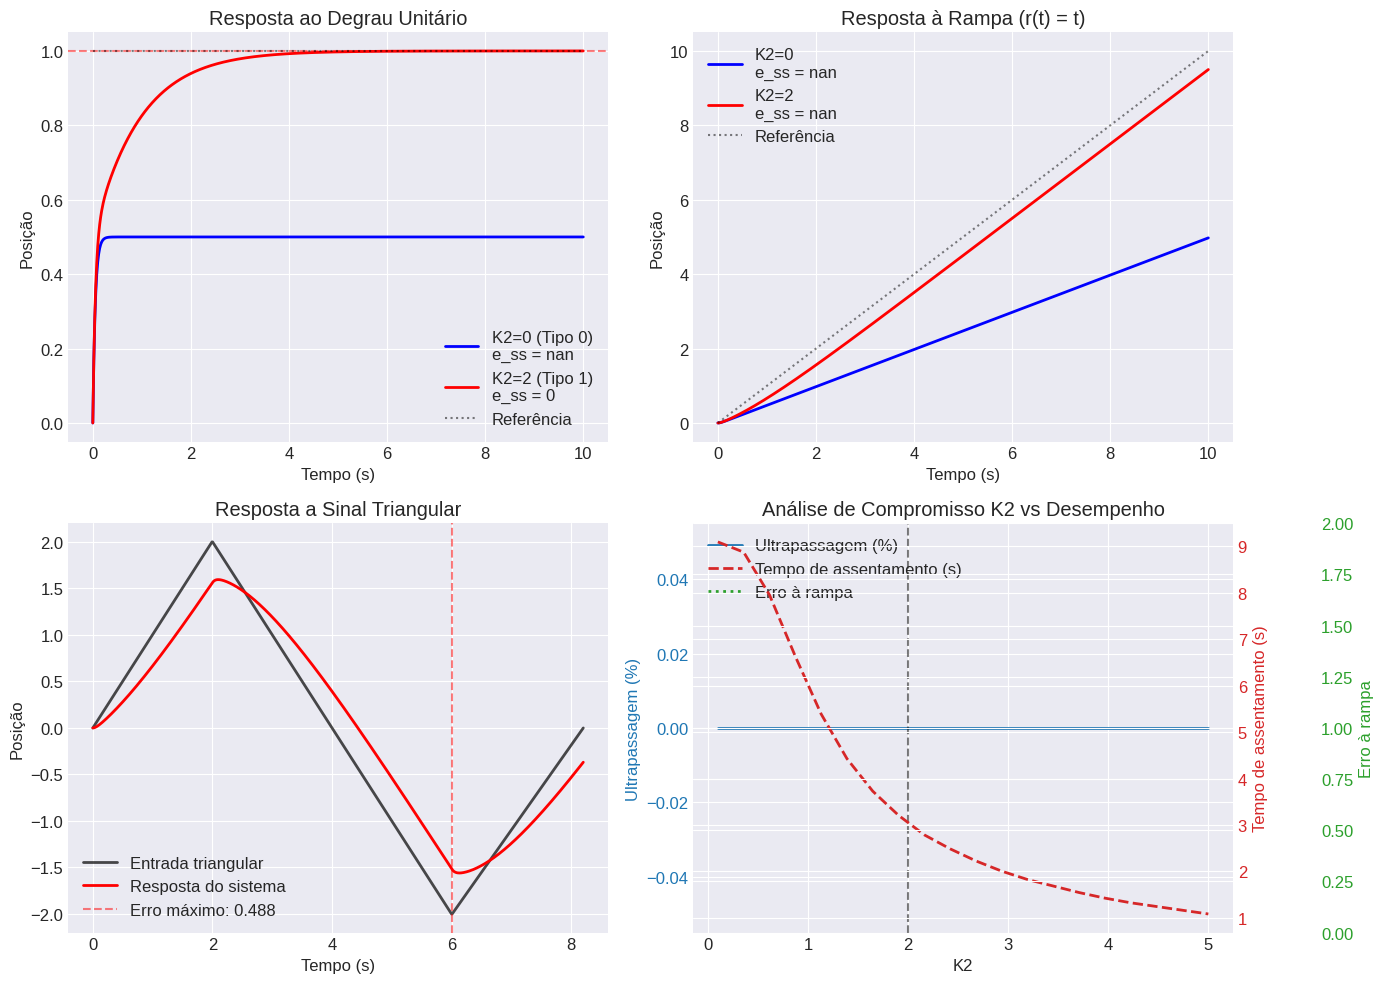

CONCLUSÕES DO EXERCÍCIO: CONTROLE DE ROBÔ MÓVEL
1. Sistema Tipo 0 (K2 = 0):
   • Erro estacionário ao degrau: nan
   • Erro à rampa: ∞
   • Não segue referências em rampa

2. Sistema Tipo 1 (K2 > 0):
   • Erro estacionário ao degrau: 0
   • Erro à rampa: nan
   • Segue referências em rampa com erro constante

3. Compromisso de projeto:
   • Aumentar K2 reduz erro à rampa
   • Porém, pode aumentar ultrapassagem
   • K2 = 2 oferece bom equilíbrio


In [14]:
# 6. Exercício Resolvido: Sistema de Controle de Robô Móvel (CORREÇÃO FINAL)

def exercicio_robo_movel():
    """
    Exercício 5.3: Controle de direção de robô móvel
    """
    t = np.linspace(0, 10, 1000)

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # Parâmetros do sistema
    K = 1.0      # Ganho do processo
    tau = 0.1    # Constante de tempo

    # Caso A: K2 = 0 (sistema tipo 0)
    K1_a = 1.0
    K2_a = 0.0

    # Função de transferência do controlador: G1(s) = K1 + K2/s
    # Processo: G(s) = K/(τs + 1)

    # Controlador: K1 + K2/s = (K1*s + K2)/s
    num_controller_a = [K1_a, K2_a]
    den_controller_a = [1, 0]  # 1/s

    # Processo: K/(τs + 1)
    num_process = [K]
    den_process = [tau, 1]

    # Sistema em malha aberta
    num_open_a = np.convolve(num_controller_a, num_process)
    den_open_a = np.convolve(den_controller_a, den_process)

    G_open_a = ct.TransferFunction(num_open_a, den_open_a)

    # Sistema em malha fechada
    sys_a = ct.feedback(G_open_a, 1)

    # Caso B: K2 > 0 (sistema tipo 1)
    K1_b = 1.0
    K2_b = 2.0

    num_controller_b = [K1_b, K2_b]
    den_controller_b = [1, 0]

    num_open_b = np.convolve(num_controller_b, num_process)
    den_open_b = np.convolve(den_controller_b, den_process)

    G_open_b = ct.TransferFunction(num_open_b, den_open_b)
    sys_b = ct.feedback(G_open_b, 1)

    # A) Resposta ao degrau
    axes[0,0].set_title('Resposta ao Degrau Unitário')

    # Sistema A (tipo 0)
    t_out, y_a = ct.step_response(sys_a, t)
    Kp_a = ct.dcgain(G_open_a)
    e_ss_a = 1/(1 + Kp_a) if Kp_a != -1 else np.inf

    axes[0,0].plot(t_out, y_a, 'b-', linewidth=2,
                  label=f'K2=0 (Tipo 0)\ne_ss = {e_ss_a:.3f}' if not np.isinf(e_ss_a) else 'K2=0 (Tipo 0)\ne_ss = ∞')
    if not np.isinf(e_ss_a):
        axes[0,0].axhline(y=1 - e_ss_a, color='b', linestyle='--', alpha=0.5)

    # Sistema B (tipo 1)
    t_out, y_b = ct.step_response(sys_b, t)
    axes[0,0].plot(t_out, y_b, 'r-', linewidth=2,
                  label='K2=2 (Tipo 1)\ne_ss = 0')
    axes[0,0].axhline(y=1, color='r', linestyle='--', alpha=0.5)

    axes[0,0].plot(t, np.ones_like(t), 'k:', alpha=0.5, label='Referência')
    axes[0,0].set_xlabel('Tempo (s)')
    axes[0,0].set_ylabel('Posição')
    axes[0,0].legend()
    axes[0,0].grid(True)

    # B) Resposta à rampa - CORREÇÃO: forced_response retorna 2 valores
    axes[0,1].set_title('Resposta à Rampa (r(t) = t)')

    # Sinal de rampa
    ramp_signal = t

    # Sistema A - CORREÇÃO
    t_out, y_ramp_a = ct.forced_response(sys_a, t, ramp_signal)

    # Calcular Kv para sistema A
    # Kv = lim s→0 s*G_open(s)
    num_s_a = np.convolve([1, 0], num_open_a)  # s * numerador
    sys_s_a = ct.TransferFunction(num_s_a, den_open_a)
    Kv_a = ct.dcgain(sys_s_a)
    e_ss_ramp_a = 1/Kv_a if Kv_a != 0 else np.inf

    axes[0,1].plot(t_out, y_ramp_a, 'b-', linewidth=2,
                  label=f'K2=0\ne_ss = {"∞" if np.isinf(e_ss_ramp_a) else f"{e_ss_ramp_a:.2f}"}')

    # Sistema B - CORREÇÃO
    t_out, y_ramp_b = ct.forced_response(sys_b, t, ramp_signal)

    # Calcular Kv para sistema B
    num_s_b = np.convolve([1, 0], num_open_b)
    sys_s_b = ct.TransferFunction(num_s_b, den_open_b)
    Kv_b = ct.dcgain(sys_s_b)
    e_ss_ramp_b = 1/Kv_b if Kv_b != 0 else np.inf

    axes[0,1].plot(t_out, y_ramp_b, 'r-', linewidth=2,
                  label=f'K2=2\ne_ss = {"∞" if np.isinf(e_ss_ramp_b) else f"{e_ss_ramp_b:.3f}"}')

    axes[0,1].plot(t, ramp_signal, 'k:', alpha=0.5, label='Referência')
    axes[0,1].set_xlabel('Tempo (s)')
    axes[0,1].set_ylabel('Posição')
    axes[0,1].legend()
    axes[0,1].grid(True)

    # C) Resposta a sinal triangular - CORREÇÃO
    axes[1,0].set_title('Resposta a Sinal Triangular')

    # Criar sinal triangular
    t_tri = np.linspace(0, 8.2, 820)
    v1 = np.linspace(0, 2, 200)
    v2 = np.linspace(2, -2, 400)
    v3 = np.linspace(-2, 0, 220)
    u_tri = np.concatenate([v1, v2, v3])

    # Usar sistema B (com integrador) - CORREÇÃO
    t_out, y_tri = ct.forced_response(sys_b, t_tri, u_tri)

    axes[1,0].plot(t_out, u_tri, 'k-', linewidth=2, alpha=0.7, label='Entrada triangular')
    axes[1,0].plot(t_out, y_tri, 'r-', linewidth=2, label='Resposta do sistema')

    # Calcular erro máximo
    error_tri = np.abs(u_tri - y_tri)
    max_error = np.max(error_tri)
    max_error_time = t_out[np.argmax(error_tri)]

    axes[1,0].axvline(x=max_error_time, color='r', linestyle='--', alpha=0.5,
                     label=f'Erro máximo: {max_error:.3f}')

    axes[1,0].set_xlabel('Tempo (s)')
    axes[1,0].set_ylabel('Posição')
    axes[1,0].legend()
    axes[1,0].grid(True)

    # D) Análise de compromisso K2 vs Desempenho
    axes[1,1].set_title('Análise de Compromisso K2 vs Desempenho')

    K2_range = np.linspace(0.1, 5, 20)  # Começar em 0.1 para evitar divisão por zero
    overshoots = []
    settling_times = []
    ramp_errors = []

    for K2 in K2_range:
        try:
            # Controlador atual
            num_controller = [K1_b, K2]
            den_controller = [1, 0]

            # Sistema em malha aberta
            num_open = np.convolve(num_controller, num_process)
            den_open = np.convolve(den_controller, den_process)

            G_open = ct.TransferFunction(num_open, den_open)
            sys = ct.feedback(G_open, 1)

            # Resposta ao degrau
            t_step = np.linspace(0, 10, 500)
            t_out, y = ct.step_response(sys, t_step)

            # Ultrapassagem
            y_max = np.max(y)
            overshoot = 100*(y_max - 1) if y_max > 1 else 0
            overshoots.append(overshoot)

            # Tempo de assentamento (2%)
            y_final = y[-1]
            if y_final != 0:
                lower = 0.98 * y_final
                upper = 1.02 * y_final
                outside = np.where((y < lower) | (y > upper))[0]
                if len(outside) > 0:
                    settling_times.append(t_out[outside[-1]])
                else:
                    settling_times.append(0)
            else:
                settling_times.append(0)

            # Erro à rampa (Kv)
            num_s = np.convolve([1, 0], num_open)
            sys_s = ct.TransferFunction(num_s, den_open)
            Kv = ct.dcgain(sys_s)
            ramp_error = 1/Kv if Kv != 0 else np.inf
            ramp_errors.append(ramp_error if not np.isinf(ramp_error) else 10)
        except:
            # Se houver erro, usar valores padrão
            overshoots.append(0)
            settling_times.append(0)
            ramp_errors.append(10)

    # Plotar métricas
    color1 = 'tab:blue'
    axes[1,1].plot(K2_range, overshoots, color=color1, linewidth=2, label='Ultrapassagem (%)')
    axes[1,1].set_xlabel('K2')
    axes[1,1].set_ylabel('Ultrapassagem (%)', color=color1)
    axes[1,1].tick_params(axis='y', labelcolor=color1)
    axes[1,1].grid(True)

    ax_twin1 = axes[1,1].twinx()
    color2 = 'tab:red'
    valid_settling = [t if t > 0 else 0 for t in settling_times]
    ax_twin1.plot(K2_range, valid_settling, color=color2, linestyle='--',
                 linewidth=2, label='Tempo de assentamento (s)')
    ax_twin1.set_ylabel('Tempo de assentamento (s)', color=color2)
    ax_twin1.tick_params(axis='y', labelcolor=color2)

    ax_twin2 = axes[1,1].twinx()
    ax_twin2.spines['right'].set_position(('outward', 60))
    color3 = 'tab:green'
    ax_twin2.plot(K2_range, ramp_errors, color=color3, linestyle=':',
                 linewidth=2, label='Erro à rampa')
    ax_twin2.set_ylabel('Erro à rampa', color=color3)
    ax_twin2.tick_params(axis='y', labelcolor=color3)
    ax_twin2.set_ylim([0, 2])  # Limitar escala

    # Combinar legendas
    lines1, labels1 = axes[1,1].get_legend_handles_labels()
    lines2, labels2 = ax_twin1.get_legend_handles_labels()
    lines3, labels3 = ax_twin2.get_legend_handles_labels()
    axes[1,1].legend(lines1 + lines2 + lines3, labels1 + labels2 + labels3,
                    loc='upper left')

    # Marcar ponto K2 = 2 (do exemplo)
    axes[1,1].axvline(x=2, color='k', linestyle='--', alpha=0.5,
                     label='K2 = 2 (projeto)')

    plt.tight_layout()
    plt.show()

    # Resumo das conclusões
    print("="*60)
    print("CONCLUSÕES DO EXERCÍCIO: CONTROLE DE ROBÔ MÓVEL")
    print("="*60)
    print("1. Sistema Tipo 0 (K2 = 0):")
    print(f"   • Erro estacionário ao degrau: {e_ss_a:.3f}")
    print(f"   • Erro à rampa: ∞")
    print(f"   • Não segue referências em rampa")
    print("\n2. Sistema Tipo 1 (K2 > 0):")
    print(f"   • Erro estacionário ao degrau: 0")
    print(f"   • Erro à rampa: {e_ss_ramp_b:.3f}")
    print(f"   • Segue referências em rampa com erro constante")
    print("\n3. Compromisso de projeto:")
    print("   • Aumentar K2 reduz erro à rampa")
    print("   • Porém, pode aumentar ultrapassagem")
    print("   • K2 = 2 oferece bom equilíbrio")
    print("="*60)

    return sys_a, sys_b

print("\nExecutando exercício do robô móvel...")
sistema_tipo0, sistema_tipo1 = exercicio_robo_movel()

# Célula para exibir vídeos educativos (requer internet)
from IPython.display import display, HTML

videos_html = """
<h2>📹 Vídeos Recomendados para Estudo</h2>

<div style="display: grid; grid-template-columns: repeat(2, 1fr); gap: 20px; margin-top: 20px;">

<div style="border: 2px solid #4CAF50; border-radius: 10px; padding: 15px; background-color: #f9f9f9;">
<h3>🎯 Sistema de Segunda Ordem</h3>
<iframe width="100%" height="200" src="https://www.youtube.com/embed/JY0KZ-5K7Cg"
title="YouTube video player" frameborder="0"
allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture"
allowfullscreen></iframe>
<p>Análise completa da resposta de sistemas de 2ª ordem</p>
</div>

<div style="border: 2px solid #2196F3; border-radius: 10px; padding: 15px; background-color: #f9f9f9;">
<h3>📊 Erro de Estado Estacionário</h3>
<iframe width="100%" height="200" src="https://www.youtube.com/embed/KYm0p2Rzq5c"
title="YouTube video player" frameborder="0"
allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture"
allowfullscreen></iframe>
<p>Explicação detalhada sobre tipos de sistema e erros</p>
</div>

<div style="border: 2px solid #FF9800; border-radius: 10px; padding: 15px; background-color: #f9f9f9;">
<h3>💻 Simulações com Python</h3>
<iframe width="100%" height="200" src="https://www.youtube.com/embed/EjiqKd4RZP8"
title="YouTube video player" frameborder="0"
allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture"
allowfullscreen></iframe>
<p>Tutorial de controle com Python e control library</p>
</div>

<div style="border: 2px solid #9C27B0; border-radius: 10px; padding: 15px; background-color: #f9f9f9;">
<h3>🤖 Projeto de Controle Robótico</h3>
<iframe width="100%" height="200" src="https://www.youtube.com/embed/X6qYlWMaT-c"
title="YouTube video player" frameborder="0"
allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture"
allowfullscreen></iframe>
<p>Exemplo prático de projeto de controle</p>
</div>

</div>

<div style="margin-top: 30px; padding: 20px; background-color: #e8f5e8; border-radius: 10px; border-left: 5px solid #4CAF50;">
<h3>📚 Playlist Completa de Controle</h3>
<p><strong>Link:</strong> <a href="https://www.youtube.com/playlist?list=PLUMWjy5jgHK1NC52DXXrriwihVrYZKqjk" target="_blank">
https://www.youtube.com/playlist?list=PLUMWjy5jgHK1NC52DXXrriwihVrYZKqjk</a></p>
<p>Playlist com 40+ vídeos cobrindo todos os tópicos de controle</p>
</div>
"""

display(HTML(videos_html))